# Wine Quality Prediction – Red Wine (Classification)
Student ID: 991540420
Project Number: 0


In [2]:
!pip install pycaret[full]
!pip install pandas==2.1.4 numpy==1.23.4 --force-reinstall
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [3]:
import sys
print(sys.version)

import pandas as pd
import numpy as np
from pycaret.classification import *

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
import pycaret
print("PyCaret version:", pycaret.__version__)


3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Pandas version: 2.1.4
Numpy version: 1.26.4
PyCaret version: 3.3.2


In [4]:
from google.colab import files
print('Please upload winequality-red.csv')
uploaded = files.upload()
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

Please upload winequality-red.csv


Saving winequality-red.csv to winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()

print("\nSummary statistics:")
df.describe()

Shape: (1599, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Summary statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df["quality"] = df["quality"].astype("category")

print("Quality value counts:")
df["quality"].value_counts().sort_index()

Quality value counts:


,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


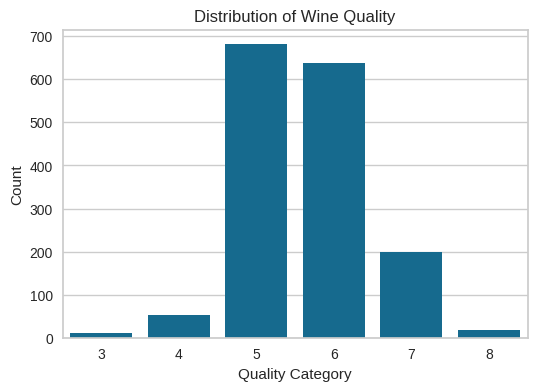

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()


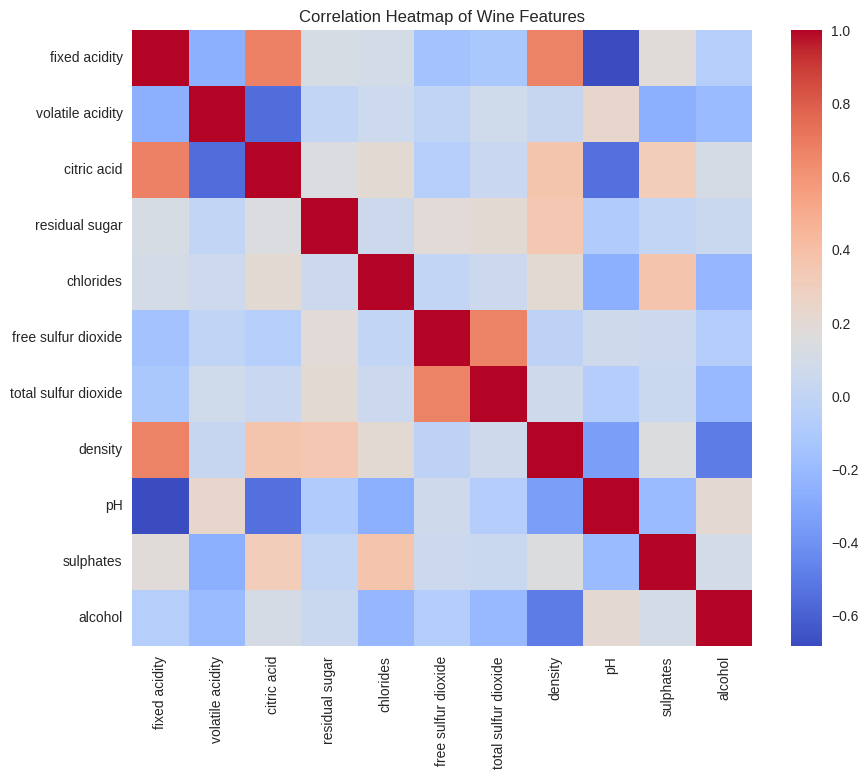

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=["quality"]).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Wine Features")
plt.show()

In [11]:
clf_setup = setup(data=df, target='quality', session_id=991540420,
                  normalize=True, train_size=0.8, silent=True, verbose=False)

,Description,Value
0,Session id,991540420
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1279, 12)"
7,Transformed test set shape,"(320, 12)"
8,Numeric features,11
9,Preprocess,True


In [12]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7006,0.6947,0.7006,0.6760,0.6816,0.5134,0.5183,0.2640
rf,Random Forest Classifier,0.6967,0.6855,0.6967,0.6673,0.6759,0.5057,0.5108,0.3550
catboost,CatBoost Classifier,0.6889,0.6785,0.6889,0.6600,0.6711,0.4990,0.5022,7.9800
lightgbm,Light Gradient Boosting Machine,0.6841,0.6716,0.6841,0.6573,0.6674,0.4915,0.4947,1.8530
xgboost,Extreme Gradient Boosting,0.6802,0.6780,0.6802,0.6552,0.6649,0.4867,0.4896,0.3440
gbc,Gradient Boosting Classifier,0.6622,0.0000,0.6622,0.6470,0.6483,0.4557,0.4592,1.5830
dt,Decision Tree Classifier,0.6161,0.5685,0.6161,0.6187,0.6147,0.4004,0.4022,0.0460
lr,Logistic Regression,0.6091,0.0000,0.6091,0.5761,0.5874,0.3619,0.3652,1.0180
lda,Linear Discriminant Analysis,0.5997,0.0000,0.5997,0.5759,0.5849,0.3583,0.3604,0.0340
ridge,Ridge Classifier,0.5896,0.0000,0.5896,0.4891,0.5339,0.3025,0.3135,0.0380


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=991540420, verbose=0,
                     warm_start=False)

In [13]:
et = create_model("et")
tuned_et = tune_model(et)
tuned_et

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7578,0.8680,0.7578,0.7240,0.7373,0.6042,0.6080
1,0.6641,0.8391,0.6641,0.6411,0.6478,0.4554,0.4608
2,0.6641,0.8469,0.6641,0.6293,0.6365,0.4420,0.4491
3,0.6797,0.8510,0.6797,0.6492,0.6607,0.4848,0.4894
4,0.6719,0.0000,0.6719,0.6450,0.6533,0.4635,0.4668
5,0.6484,0.0000,0.6484,0.6245,0.6349,0.4372,0.4388
6,0.7734,0.9068,0.7734,0.7336,0.7468,0.6299,0.6358
7,0.6719,0.8542,0.6719,0.6652,0.6609,0.4687,0.4720
8,0.7109,0.8992,0.7109,0.6959,0.6945,0.5360,0.5386


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6953,0.8173,0.6953,0.5754,0.6297,0.4793,0.4965
1,0.6016,0.7808,0.6016,0.5015,0.5463,0.3206,0.3325
2,0.6172,0.7781,0.6172,0.5091,0.5575,0.3450,0.3581
3,0.5703,0.7448,0.5703,0.4755,0.5180,0.2673,0.2772
4,0.5703,0.0000,0.5703,0.4670,0.5107,0.2630,0.2757
5,0.5312,0.0000,0.5312,0.4376,0.4798,0.2053,0.2131
6,0.6484,0.8278,0.6484,0.5356,0.5861,0.4043,0.4200
7,0.5312,0.7365,0.5312,0.4286,0.4709,0.2021,0.2133
8,0.6250,0.8264,0.6250,0.5109,0.5619,0.3633,0.3775


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=991540420, verbose=0,
                     warm_start=False)

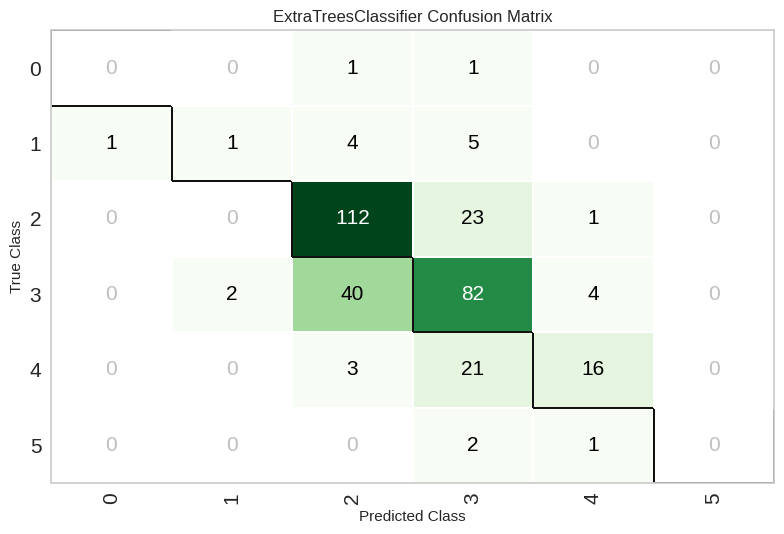

In [16]:
plot_model(best_model, plot='confusion_matrix')

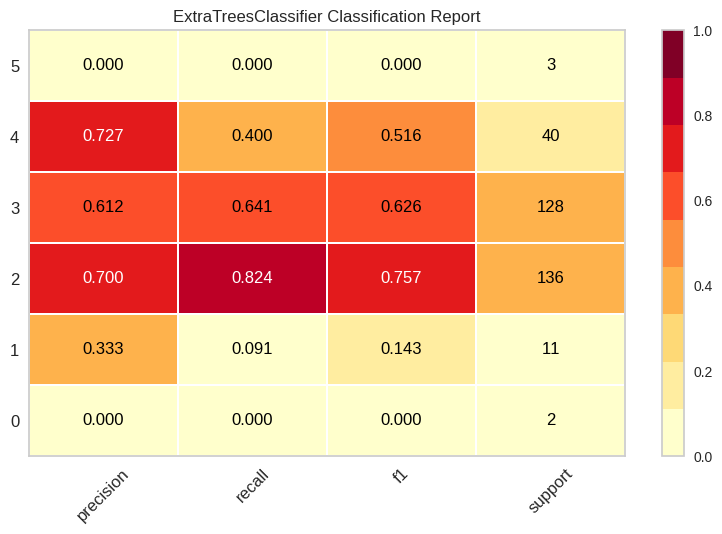

In [17]:
plot_model(best_model, plot='class_report')


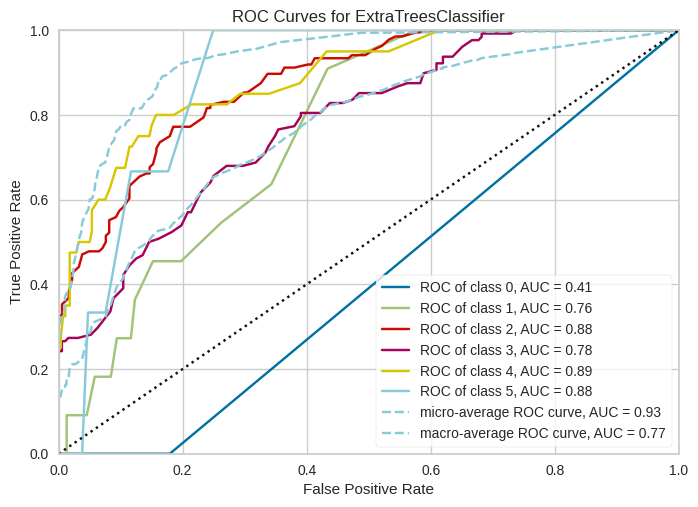

In [18]:
plot_model(best_model, plot='auc')


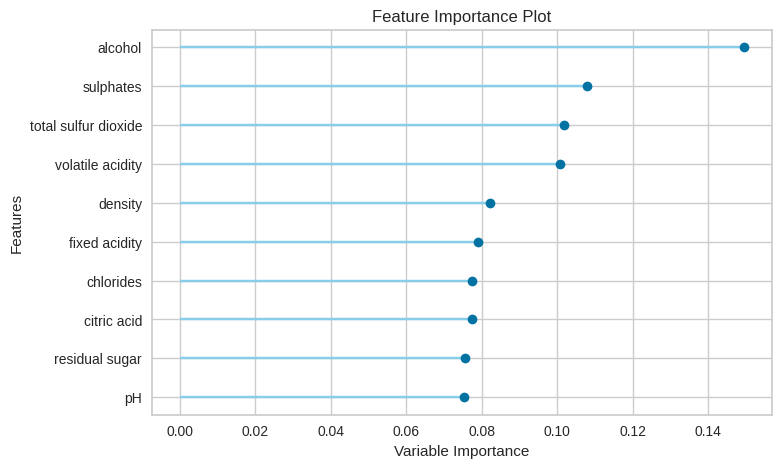

In [19]:

plot_model(best_model, plot='feature')

In [23]:
final_model = finalize_model(best_model)
preds = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [24]:
save_model(final_model, 'final_wine_quality_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    